In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
df = pd.read_csv('my_csv.csv')
df.drop(columns="Unnamed: 0", inplace=True)
df.head(5)

,total,available,percent,used,free,active,inactive,buffers,cached,shared,slab,timestamp
0,8231768064,656953344,92.0,6115639296,139862016,2113859584,5238013952,47185920,1929080832,1167478784,300666880,2021-09-11 21:16:39.101983
1,8231768064,656207872,92.0,6116356096,140378112,2113859584,5237104640,47185920,1927847936,1167478784,300666880,2021-09-11 21:16:39.106612
2,8231768064,729128960,91.1,6058627072,224620544,2120364032,5155483648,45801472,1902718976,1152180224,300896256,2021-09-11 21:17:39.169346
3,8231768064,726630400,91.2,6058893312,221548544,2151141376,5126684672,45924352,1905401856,1154404352,300969984,2021-09-11 21:18:39.181644
4,8231768064,967098368,88.3,5824544768,458522624,2151714816,4859400192,46284800,1902415872,1148301312,300806144,2021-09-11 21:19:39.210133


In [2]:
df.columns

Index(['total', 'available', 'percent', 'used', 'free', 'active', 'inactive',
       'buffers', 'cached', 'shared', 'slab', 'timestamp'],
      dtype='object')

In [3]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head(5)

,total,available,percent,used,free,active,inactive,buffers,cached,shared,slab,timestamp
0,8231768064,656953344,92.0,6115639296,139862016,2113859584,5238013952,47185920,1929080832,1167478784,300666880,2021-09-11 21:16:39.101983
1,8231768064,656207872,92.0,6116356096,140378112,2113859584,5237104640,47185920,1927847936,1167478784,300666880,2021-09-11 21:16:39.106612
2,8231768064,729128960,91.1,6058627072,224620544,2120364032,5155483648,45801472,1902718976,1152180224,300896256,2021-09-11 21:17:39.169346
3,8231768064,726630400,91.2,6058893312,221548544,2151141376,5126684672,45924352,1905401856,1154404352,300969984,2021-09-11 21:18:39.181644
4,8231768064,967098368,88.3,5824544768,458522624,2151714816,4859400192,46284800,1902415872,1148301312,300806144,2021-09-11 21:19:39.210133


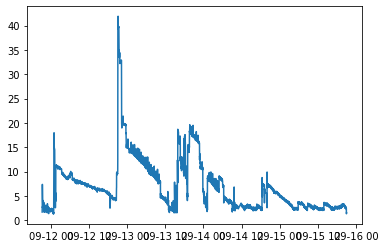

In [6]:
# dates = date2num(df['timestamp'].tolist())
plt.plot(df['timestamp'], (df['free']/df['total'])*100)

In [8]:
df["timestamp"].min(), df["timestamp"].max()

(Timestamp('2021-09-11 21:16:39.101983'),
 Timestamp('2021-09-15 20:58:51.810094'))

In [9]:
df["timestamp"].max() - df["timestamp"].min()

Timedelta('3 days 23:42:12.708111')

<AxesSubplot:xlabel='timestamp'>

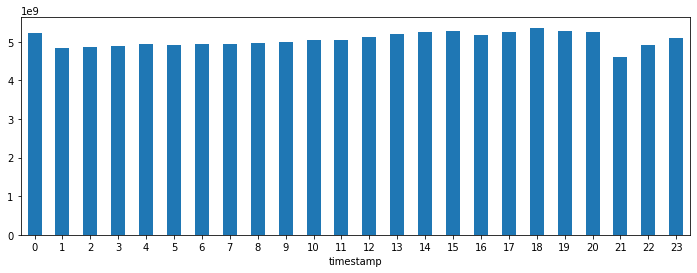

In [13]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["timestamp"].dt.hour)["used"].mean().plot(
    kind='bar', rot=0, ax=axs)